In [2]:
# call module master_df

from master_df import setup

df_master = setup()

In [3]:
import pandas as pd

In [25]:
# Other settings
pd.options.display.max_columns = 40

In [11]:
df_master.head(5)

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2018-11-07,75.36,0.00,0.00,0.00,NaT,0.00,2018-11-07,0.00,2017-08-08,0.00,2016-04-29,0.00,2017-12-14,0.00,NaT,0.00,2017-08-31,0.00,NaT,0.00,2014-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-08-04,93.63,0.00,0.00,0.00,2021-08-04,0.00,2017-07-10,0.00,2021-04-26,0.00,2021-04-28,0.00,2018-09-13,0.00,2019-07-31,0.00,2016-06-24,0.00,NaT,0.00,2015-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,8,1,L20,2021-07-14,76.95,0.00,0.00,0.00,2021-07-14,0.00,NaT,0.00,2021-04-26,0.00,NaT,0.00,2020-09-29,0.00,2019-07-31,0.00,2018-11-07,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,8,1,L20,2017-12-14,80.07,0.00,0.00,0.00,2013-09-24,0.00,NaT,0.00,2015-05-15,0.00,2016-04-29,0.00,2017-12-14,0.00,NaT,0.00,NaT,0.00,NaT,0.00,2015-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,8,1,L20,2021-01-08,49.98,0.00,0.00,0.00,2021-01-08,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_master.tail(5)

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12,78.93,"1,341.81",17.00,3.00,2023-03-15,NaN,2022-01-05,NaN,NaT,NaN,2023-05-12,8.00,2023-03-22,NaN,2022-06-02,0.00,NaT,NaN,NaT,NaN,NaT,8.00,4.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00
357825,17,BREMICKER,816E85,ZÜNDLEITUNG,0,0,5,L64,2010-06-09,5.82,0.00,0.00,0.00,2010-06-09,NaN,2003-04-01,NaN,NaT,NaN,NaT,0.00,2006-08-01,NaN,NaT,0.00,2006-11-30,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357826,0,BOSCH,0986479E87,BREMSSCHEIBE,0,0,0,00RBABA,2022-05-04,37.76,0.00,0.00,0.00,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0.00,NaT,NaN,NaT,0.00,NaT,NaN,NaT,NaN,2022-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357827,0,BOSCH,0986479E91,BREMSSCHEIBE,0,0,0,00RBABA,2023-04-19,26.46,105.84,4.00,2.00,NaT,NaN,NaT,NaN,2023-04-19,NaN,NaT,0.00,NaT,NaN,NaT,0.00,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357828,17,BREMICKER,816E95,ZÜNDLEITUNG,0,0,5,L64,2009-01-09,6.01,0.00,0.00,0.00,2007-04-18,NaN,2009-01-09,NaN,2007-11-20,NaN,NaT,0.00,2002-04-01,NaN,NaT,0.00,2006-11-30,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Build Frameworks for MVP's

1. the current spare parts inventory of a specific subsidiary or across all subsidiaries
2. the inventory for one, several or all spare part product(s)
3. which supplier a product was obtained from
4. the product's description
5. the total number of products which are in stock at a specific subsidiary or across all subsidiaries
6. the value of products of a specific subsidiary or across all subsidiaries

In [56]:
# 1. The current spare parts inventory of a specific subsidiary or across all subsidiaries (all subsidies enter "gesamt" )

specific_subsidy = input('Please enter subsidy or "gesamt":')  # Enter respective subsidiary
specific_subsidy = f'{specific_subsidy}_lager'
specific_subsidy_inventory = df_master[['artnr', 'beschreibung', specific_subsidy]]
grouped_inventory_data_subsidy = specific_subsidy_inventory.groupby(['artnr', 'beschreibung']).sum()
filtered_data = grouped_inventory_data_subsidy[grouped_inventory_data_subsidy[specific_subsidy] != 0]
filtered_data

,,ros_lager
artnr,beschreibung,
024.352,ZKD BMW,2.00
03.0137-0379.2,TBB-SATZ,2.00
03.0137-4013.2,TBB-SATZ MIT ZUBEHOER,1.00
03.0137-9024.2,TBB-ZUBEHOER,1.00
03.0137-9062.2,TBB-ZUBEHOER,2.00
...,...,...
WM6682,RADLAGERSATZ OHNE GEHÄUSE/NABE,1.00
WM7462,RADLAGERSATZ TOYOTA HI.,1.00
WM7536,RADLAGERSATZ MAZDA VO.,1.00


In [112]:
# check data type of artnr
data_type = type(df_master.loc[0, 'artnr'])
print("Data type of the first row under 'artnr' column:", data_type)

Data type of the first row under 'artnr' column: <class 'str'>


In [10]:
# check data type of artnr
df_master['artnr'].map(type)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
357824    <class 'str'>
357825    <class 'str'>
357826    <class 'str'>
357827    <class 'str'>
357828    <class 'str'>
Name: artnr, Length: 357829, dtype: object

In [18]:
# only show rows where value of column is greater than null 
df_gesamt_notnull = df_master[df_master['gesamt_lager'] > 0]
df_gesamt_notnull

,lfnr,lieferant,artnr,beschreibung,index,bestellkennzeichen,verp_einheit,stat_gruppe,ltz_vk_ges,basispreis,basispr_summe,gesamt_lager,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
14,430,Eberspächer Abgas,08.693.60,"K SET CORSA A 1,2I 33KW",0,0,1,L20,NaT,131.39,131.39,1.00,1.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,430,Eberspächer Abgas,08.683.73,"R CORSA A 1,3N/S/1,4",0,0,1,L20,NaT,8.76,8.76,1.00,1.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,430,Eberspächer Abgas,08.608.86,"N CORSA D 1,4L 66KW BJ 2006-",0,0,0,L20,2021-08-04,92.11,92.11,1.00,1.00,2021-08-04,0.00,2017-07-10,0.00,2018-08-20,0.00,2017-11-07,0.00,2018-09-13,0.00,2016-08-11,0.00,NaT,0.00,2018-05-04,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,430,Eberspächer Abgas,08.683.90,"B CORSA A 1,0S",0,0,1,L20,2016-07-13,4.74,9.48,2.00,2.00,2016-07-13,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,430,Eberspächer Abgas,08.592.90,"B KADETT E 1,7D AB 1989",0,0,1,L20,NaT,19.26,57.78,3.00,3.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,0.00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357821,17,BREMICKER,403E52,ZÜNDLEITUNG,0,0,5,L64,2010-01-05,11.22,11.22,1.00,1.00,2010-01-05,NaN,2003-04-01,NaN,2005-04-26,NaN,NaT,0.00,2009-05-23,NaN,NaT,0.00,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357822,0,BOSCH,0986479E52,BREMSSCHEIBE,0,0,0,00RBABA,2023-05-31,43.84,526.08,12.00,2.00,2023-03-08,NaN,2023-04-19,NaN,2023-05-24,NaN,NaT,0.00,2023-05-31,NaN,2022-12-21,0.00,NaT,NaN,2022-05-11,NaN,2023-05-12,46.00,21.00,4.00,12.00,4.00,3.00,0.00,0.00,2.00,0.00
357823,0,BOSCH,0986479E78,BREMSSCHEIBE 1 STK!!,0,DE,0,00RBABC,2023-05-15,99.17,793.36,8.00,2.00,2022-11-16,NaN,NaT,NaN,NaT,NaN,NaT,2.00,2023-05-15,NaN,2022-11-16,0.00,NaT,NaN,2022-11-17,NaN,NaT,8.00,4.00,0.00,4.00,2.00,0.00,0.00,0.00,-2.00,0.00
357824,0,BOSCH,0986479E79,BREMSSCHEIBE,0,VO,0,00RBABC,2023-05-12,78.93,"1,341.81",17.00,3.00,2023-03-15,NaN,2022-01-05,NaN,NaT,NaN,2023-05-12,8.00,2023-03-22,NaN,2022-06-02,0.00,NaT,NaN,NaT,NaN,NaT,8.00,4.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00


In [58]:
# 2a. The inventory for one product, by summing up different subsidies stocks

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    subsidiary_columns = ['wen_lager', 'rgb_lager', 'amb_lager', 'cha_lager', 'str_lager', 'pas_lager', 'lan_lager', 'müh_lager', 'ros_lager']
    total_stock = 0

    for column in subsidiary_columns:
        total_stock += matching_rows[column].sum()

    print("Total inventory for article", specific_artnr, "across subsidiaries:")
    print(total_stock)
else:
    print("No matching rows found for the specified article number.")


Total inventory for article 0986479E79 across subsidiaries:
11.0


In [32]:
# 2b. The inventory for one product, by summing up gesamt_lager

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    total_stock = 0

    for index, row in matching_rows.iterrows():
        total_stock += row['gesamt_lager']

    print("Total inventory for article", specific_artnr, "across subsidiaries:")
    print(total_stock)
else:
    print("No matching rows found for the specified article number.")


Total inventory for article 0986479E79 across subsidiaries:
17.0


In [65]:
# 2c the inventory for several products
# example article numbers: 403E52, WM3489

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = ['wen_lager', 'rgb_lager', 'amb_lager', 'cha_lager', 'str_lager', 'pas_lager', 'lan_lager', 'müh_lager', 'ros_lager']
        total_stock = 0

        for column in subsidiary_columns:
            total_stock += matching_rows[column].sum()

        print("Total inventory for article", specific_artnr, "across subsidiaries:")
        print(total_stock)
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers


Total inventory for article 403E52 across subsidiaries:
1.0

Total inventory for article WM3489 across subsidiaries:
1.0

No matching rows found for the specified article number: gesamt



In [68]:
# 2c the inventory for several products
# example article numbers: 403E52, WM3489

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = {'gesamt_lager': 'Gesamt', 'wen_lager': 'Wen', 'rgb_lager': 'RGB'}
        total_stock = {}

        for column, label in subsidiary_columns.items():
            total_stock[label] = matching_rows[column].sum()

        print("Total inventory for article", specific_artnr, "across subsidiaries:")
        for label, stock in total_stock.items():
            print(label, ":", stock)
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers


Total inventory for article 403E52 across subsidiaries:
Gesamt : 1.0
Wen : 1.0
RGB : 0.0

Total inventory for article WM3489 across subsidiaries:
Gesamt : 1.0
Wen : 0.0
RGB : 0.0



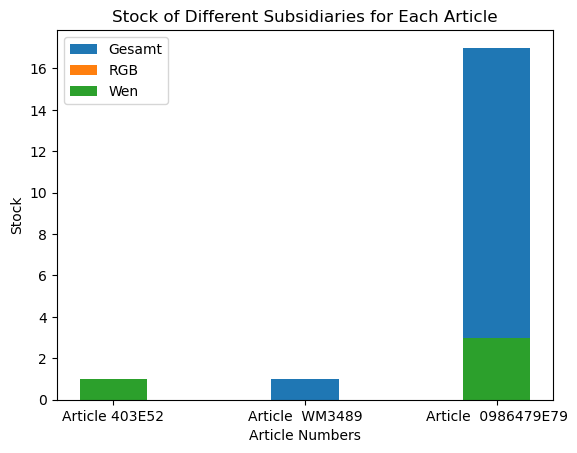

In [73]:
import matplotlib.pyplot as plt

# 2c the inventory for several products
# example article numbers: 403E52, WM3489, 0986479E79

article_numbers = input('Please enter the article numbers (separated by commas): ')
article_numbers = article_numbers.split(',')

gesamt_stock = []
rgb_stock = []
wen_stock = []

for specific_artnr in article_numbers:
    specific_artnr = specific_artnr.strip()  # Remove any leading/trailing spaces
    matching_rows = df_master[df_master['artnr'] == specific_artnr]

    if not matching_rows.empty:
        subsidiary_columns = {'gesamt_lager': 'Gesamt', 'wen_lager': 'Wen', 'rgb_lager': 'RGB'}
        total_stock = {}

        for column, label in subsidiary_columns.items():
            total_stock[label] = matching_rows[column].sum()

        gesamt_stock.append(total_stock['Gesamt'])
        rgb_stock.append(total_stock['RGB'])
        wen_stock.append(total_stock['Wen'])
    else:
        print("No matching rows found for the specified article number:", specific_artnr)
    print()  # Add a newline for readability between different article numbers

# Prepare the x-axis tick labels
x_labels = [f'Article {artnr}' for artnr in article_numbers]

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()

# Create the bars
gesamt_bars = ax.bar(x_labels, gesamt_stock, width=bar_width, label='Gesamt')
rgb_bars = ax.bar(x_labels, rgb_stock, width=bar_width, label='RGB')
wen_bars = ax.bar(x_labels, wen_stock, width=bar_width, label='Wen')

# Set labels and title
ax.set_xlabel('Article Numbers')
ax.set_ylabel('Stock')
ax.set_title('Stock of Different Subsidiaries for Each Article')
ax.legend()

# Show the chart
plt.show()


In [71]:
# use to verify that above multiple article number stock is correct

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    print("Rows for article number", specific_artnr, ":")
    print(matching_rows)
else:
    print("No matching rows found for the specified article number:", specific_artnr)


No matching rows found for the specified article number: 403E52, WM3489, 0986479E79


In [ ]:
# for No. 2 still missing ALL article numbers

In [40]:
# 3. which supplier a product was obtained from
# still to be covered if article number got provided by several suppliers

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    specific_article_supplier = matching_rows['lieferant'].iloc[0]

    print("Supplier for article", specific_artnr, ":")
    print(specific_article_supplier)
else:
    print("No matching rows found for the specified article number.")

Supplier for article 10604-8T7 :
WAECO


In [61]:
# 4. the product's description

specific_artnr = str(input('Please enter the article number: '))

matching_rows = df_master[df_master['artnr'] == specific_artnr]

if not matching_rows.empty:
    specific_article_beschr = matching_rows['beschreibung'].iloc[0]

    print("Description for article", specific_artnr, ":")
    print(specific_article_beschr)
else:
    print("No matching rows found for the specified article number.")

Description for article 0986479E78 :
BREMSSCHEIBE 1 STK!!


5. the total number of products which are in stock at a specific subsidiary or across all subsidiaries

**already covered by Max**

In [63]:
# 6. the value of products of a specific subsidiary or across all subsidiaries

specific_subsidy = input('Please enter subsidy or "gesamt":')  # Enter respective subsidiary or gesamt for all subsidies
specific_subsidy = f'{specific_subsidy}_lager'

specific_subsidy_value = df_master[specific_subsidy] * df_master['basispreis']
total_value_specific_subsidy = specific_subsidy_value.sum()
total_value_specific_subsidy
print("The value of articles in subsidiary", specific_subsidy, "is:", total_value_specific_subsidy)

The value of articles in subsidiary gesamt_lager is: 9562601.22
